<a href="https://colab.research.google.com/github/Mezekr/Focus-level-of-students-in-online-learning/blob/main/model_with_dataAug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive again if it is not mounted

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import os
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Data Augmentation Layer

In [ ]:
# Define a data augmentation stage to add to an image model

data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.15),
        layers.experimental.preprocessing.RandomZoom(0.1),
        layers.experimental.preprocessing.RandomTranslation(0.1, 0.1),
        layers.experimental.preprocessing. RandomContrast(0.25)
        
    ]
)

In [ ]:
train_dir = r"/content/drive/MyDrive/ProjSem_KI/emotion_dataset/train"
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size =(180, 180),
    batch_size = 8 )

val_dir = r"/content/drive/MyDrive/ProjSem_KI/emotion_dataset/validation"
validation_dataset = image_dataset_from_directory(

    val_dir,
    image_size=(180, 180),
    batch_size= 8 )

test_dir = r"/content/drive/MyDrive/ProjSem_KI/emotion_dataset/test"
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size =(180, 180),
    batch_size = 8 )

Found 270 files belonging to 3 classes.
Found 60 files belonging to 3 classes.
Found 60 files belonging to 3 classes.


# Example of an augmented image

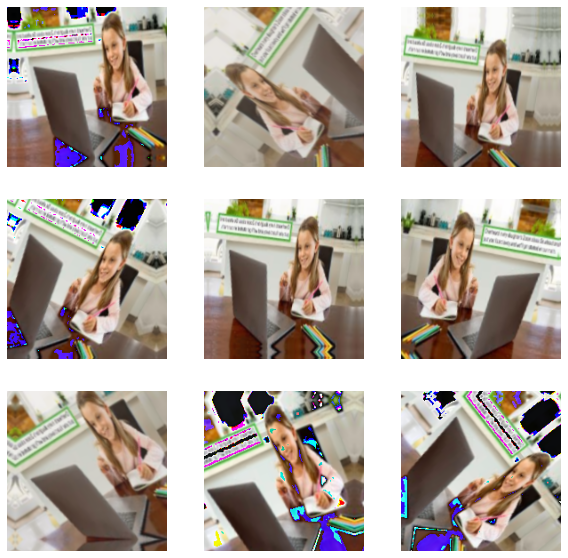

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


# Second model with data Augmentation 

In [ ]:
inputs = keras.Input(shape=(180,180,3))
x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                             

# compilie und optimizer

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


#Data preprocessing

In [ ]:
train_dir = r"/content/drive/MyDrive/ProjSem_KI/emotion_dataset/train"
train_dataset = image_dataset_from_directory(
    train_dir,
    image_size = (180, 180),
    batch_size = 8 )

val_dir = r"/content/drive/MyDrive/ProjSem_KI/emotion_dataset/validation"
validation_dataset = image_dataset_from_directory(
    val_dir,
    image_size=(180, 180),
    batch_size= 8 )

test_dir = r"/content/drive/MyDrive/ProjSem_KI/emotion_dataset/test"
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size = (180, 180),
    batch_size = 8 )
print("Data set Done!!")

Found 270 files belonging to 3 classes.
Found 60 files belonging to 3 classes.
Found 60 files belonging to 3 classes.
Data set Done!!


#Fitting the model using a Dataset

In [ ]:
filepath = r"/content/drive/MyDrive/ProjSem_KI/Models/dataAug_model.keras"
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath,
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=40,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/40
34/34 [==============================] - 34s 581ms/step - loss: 1.1036 - accuracy: 0.3333 - val_loss: 1.0987 - val_accuracy: 0.3500
Epoch 2/40
34/34 [==============================] - 2s 54ms/step - loss: 1.1019 - accuracy: 0.3222 - val_loss: 1.0985 - val_accuracy: 0.3333
Epoch 3/40
34/34 [==============================] - 2s 47ms/step - loss: 1.1022 - accuracy: 0.3185 - val_loss: 1.0991 - val_accuracy: 0.3333
Epoch 4/40
34/34 [==============================] - 2s 48ms/step - loss: 1.1007 - accuracy: 0.3037 - val_loss: 1.0993 - val_accuracy: 0.3333
Epoch 5/40
34/34 [==============================] - 2s 48ms/step - loss: 1.0974 - accuracy: 0.3556 - val_loss: 1.0989 - val_accuracy: 0.3167
Epoch 6/40
34/34 [==============================] - 2s 48ms/step - loss: 1.1002 - accuracy: 0.3407 - val_loss: 1.0988 - val_accuracy: 0.3167
Epoch 7/40
34/34 [==============================] - 2s 47ms/step - loss: 1.1023 - accuracy: 0.3037 - val_loss: 1.0989 - val_accuracy: 0.3667
Epoch 8/40


# Displaying curves of loss and accuracy during training



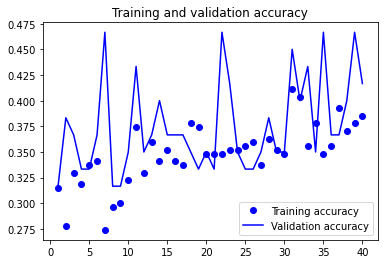

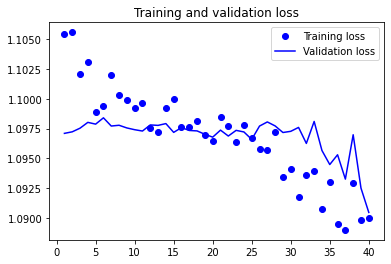

In [ ]:
# Displaying curves of loss and accuracy during training

import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## Evaluating the model on the test set

In [ ]:
# Evaluating the model on the test set

saved_model = r"/content/drive/MyDrive/ProjSem_KI/Models/dataAug_model.keras"

test_model = keras.models.load_model(saved_model)
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
 

8/8 [==============================] - 0s 15ms/step - loss: 1.0907 - accuracy: 0.3333
Test accuracy: 0.333
